# Session 4 Exercises
These are sample answers for the in-class exercises in Session 4 of PHAS0030.  You should make sure that you can do these yourself ! The further work exercises will be in a separate notebook.

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 4. Euler's equation

### Question 1

In [2]:
# Specify step size and simulation length
dx = 0.5
total_x = 20
N = int(total_x/dx)
x = np.linspace(0,total_x,N+1) # Store end point 
# Initial condition
y0 = 1.0
# Define k
k = 1.2
y = np.zeros(N+1)
y0 = 1.0
y[0] = y0
for i in range(N):
    y[i+1] = y[i]+dx*(-k*y[i])

### Question 2

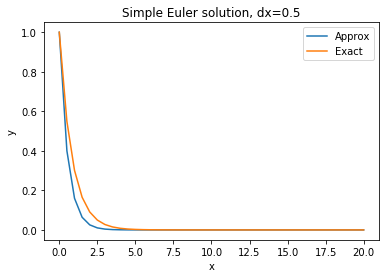

In [3]:
exact_y = y0*np.exp(-k*x)
plt.plot(x,y,label='Approx')
plt.plot(x,exact_y,label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Euler solution, dx=0.5')
plt.legend()

Now we will change the step size.  First we reduce it to 0.1

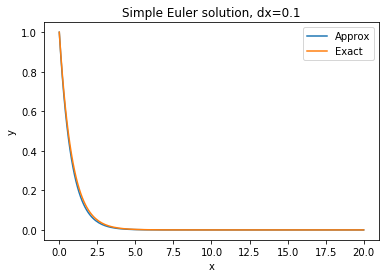

In [4]:
dx = 0.1
N = int(total_x/dx)
x = np.linspace(0,total_x,N+1) # Store end point 
yp = np.zeros(N+1)
y0 = 1.0
yp[0] = y0
for i in range(N):
    yp[i+1] = yp[i]+dx*(-k*yp[i])
plt.plot(x,yp,label='Approx')
plt.plot(x,y0*np.exp(-k*x),label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Euler solution, dx=0.1')
plt.legend()

This produces excellent agreement with the analytic solution.

Let's increase it to 1.0

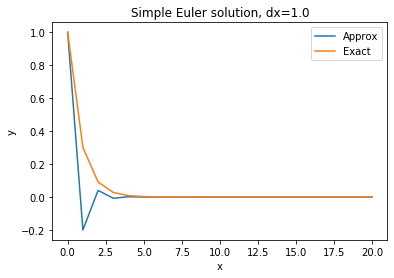

In [5]:
dx = 1.0
N = int(total_x/dx)
x = np.linspace(0,total_x,N+1) # Store end point 
yp = np.zeros(N+1)
y0 = 1.0
yp[0] = y0
for i in range(N):
    yp[i+1] = yp[i]+dx*(-k*yp[i])
plt.plot(x,yp,label='Approx')
plt.plot(x,y0*np.exp(-k*x),label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Euler solution, dx=1.0')
plt.legend()

This is a very poor solution! We see that the effect of $\Delta x$ is exactly as in the notes: and a value around 0.1 is just about OK.

## 4.3 Beyond first order

### Question 1

Note that I've chosen to allow an arbitrary size vector y; it would be fine to code this for the simple two component situation that we will be dealing with.

In [6]:
def euler_solver(fun,y0,dt,N):
    """Solve dy/dt = fun(y,t) using Euler's method.
    Inputs:
    fun  f(t,y)
    y0   Initial condition
    dt   Step size
    N    Number of steps
    Returns: array of length N+1 with values of y
    """
    # Note that np.size will work with single numbers and arrays
    retval = np.zeros((N+1,np.size(y0)))
    retval[0] = y0
    t = 0
    for i in range(N):
        t += dt
        retval[i+1] = retval[i] + dt*fun(t,retval[i])
    return retval

### Question 2

We need to define the function (RHS of the equation) and then call it

In [7]:
def RHS_SHO(t,y):
    """Return acceleration of SHO, defines k & m internally"""
    k = 1.0
    m = 1.0
    x = y[0]
    v = y[1]
    dx = v
    dv = -k*x/m
    return np.array([dx,dv])

Text(0.5, 1.0, 'SHO motion from Euler solver')

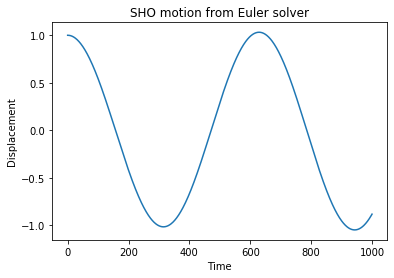

In [8]:
motion = euler_solver(RHS_SHO,[1.0,0.0],0.01,1000)
plt.plot(motion[:,0])
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('SHO motion from Euler solver')

Note that a larger step size (I started with 0.1) gives an unstable solution which grows with time.

## 5. Beyond Euler

### Question 1

In [9]:
def RK4_solver(fun,y0,dt,N):
    """Solve dy/dt = fun(y,t) using fourth-order RK method.
    Inputs:
    fun  f(y,t)
    y0   Initial condition - assumed to be two-component
    dt   Step size
    N    Number of steps
    Returns: two arrays of length N+1 (x and v or equivalent)
    """
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    x[0] = y0[0]
    v[0] = y0[1]
    t = 0
    y = y0
    for i in range(N):
        k1 = dt*fun(y,t)
        k2 = dt*fun(y+0.5*k1,t+0.5*dt)
        k3 = dt*fun(y+0.5*k2,t+0.5*dt)
        k4 = dt*fun(y+k3,t+dt)
        y=y+(k1+2*k2+2*k3+k4)/6
        x[i+1] = y[0]
        v[i+1] = y[1]
    return x, v

### Question 2

In [10]:
def RHS_linear_pendulum(y,t):
    """Implements linear pendulum RHS for ODE solver"""
    g = 9.8
    L = 1.0
    x = y[0]
    v = y[1]
    dx = v
    dv = -g*x/L
    return np.array([dx,dv])

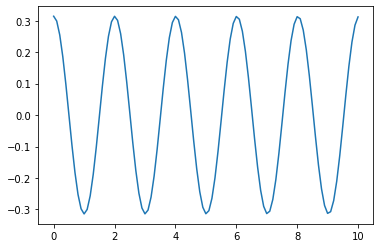

In [12]:
dt = 0.1
total_t = 10
N = int(total_t/dt)
lin_p_x, lin_p_v = RK4_solver(RHS_linear_pendulum,[0.1*np.pi,0.0],dt,N)
t = np.arange(0,total_t+0.00001,dt)
plt.plot(t,lin_p_x)

This is the expected period ($T = 2\pi/\omega$ with $\omega = \sqrt{g/L}$). 

I found that $\Delta t = 0.1$ gives a stable solution (roughly 10 times larger than Euler - for only four times the cost).

## 6. Boundary value problems

### Question 1

In [13]:
def ball_vertical_RHS(y,t):
    """Calculate RHS for projectile ODE"""
    x = y[0]
    v = y[1]
    dx = v
    dv = -g
    return np.array([dx,dv])

In [14]:
g  = 9.81 # m/s^2
t0 = 0.0  # s
t1 = 10.0 # s
dt = 0.05 # s
N  = int((t1-t0)/dt)
v_guess_1 = 0   # m/s
v_guess_2 = 200 # m/s

h1, vtmp = RK4_solver(ball_vertical_RHS,[0.0,v_guess_1],dt,N)
h2, vtmp = RK4_solver(ball_vertical_RHS,[0.0,v_guess_2],dt,N)
tol = 1e-4
err = h2[N] - h1[N]
while err > tol:
    v_new = v_guess_2 - h2[N]*(v_guess_2 - v_guess_1)/(h2[N] - h1[N])
    err = abs(v_guess_1 - v_guess_2)
    v_guess_1 = v_guess_2
    v_guess_2 = v_new
    h1, vtmp = RK4_solver(ball_vertical_RHS,[0.0,v_guess_1],dt,N)
    h2, vtmp = RK4_solver(ball_vertical_RHS,[0.0,v_guess_2],dt,N)
print("Initial velocity required is ",v_new)

Initial velocity required is  49.04999999999995


Text(0.5, 1.0, 'Trajectory of projectile')

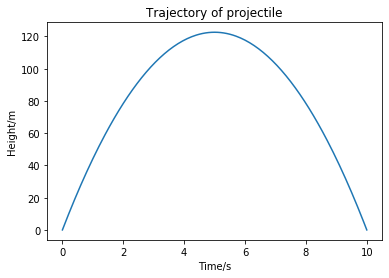

In [15]:
plt.plot(np.arange(t0,t1+0.5*dt,dt),h1)
plt.xlabel('Time/s')
plt.ylabel('Height/m')
plt.title('Trajectory of projectile')

### Question 2

In [16]:
g  = 9.81 # m/s^2
t0 = 0.0  # s
t1 = 10.0 # s
dt = 0.05 # s
N  = int((t1-t0)/dt)
v_guess_1 = 0   # m/s
v_guess_2 = 200 # m/s

store = []
h1, vtmp = RK4_solver(ball_vertical_RHS,[0.0,v_guess_1],dt,N)
store.append(h1)
h2, vtmp = RK4_solver(ball_vertical_RHS,[0.0,v_guess_2],dt,N)
store.append(h2)
tol = 1e-4
err = h2[N] - h1[N]
while err > tol:
    v_new = v_guess_2 - h2[N]*(v_guess_2 - v_guess_1)/(h2[N] - h1[N])
    err = abs(v_guess_1 - v_guess_2)
    v_guess_1 = v_guess_2
    v_guess_2 = v_new
    h1, vtmp = RK4_solver(ball_vertical_RHS,[0.0,v_guess_1],dt,N)
    h2, vtmp = RK4_solver(ball_vertical_RHS,[0.0,v_guess_2],dt,N)
    store.append(h2)
print("Initial velocity required is ",v_new)

Initial velocity required is  49.04999999999995


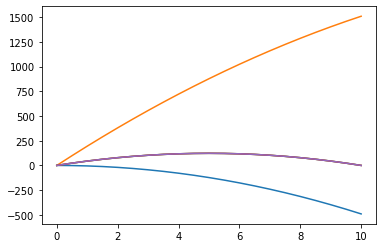

In [17]:
t = np.arange(t0,t1+0.5*dt,dt)
for traj in store:
    plt.plot(t,traj)

## 7. SciPy functions

### Question 1

In [18]:
from scipy import integrate

In [19]:
def RHS_linear_pendulum_scipy(t,y):
    """Implements linear pendulum RHS for ODE solver"""
    g = 9.8
    L = 1.0
    x = y[0]
    v = y[1]
    dx = v
    dv = -g*x/L
    return np.array([dx,dv])

In [20]:
sp_solve = integrate.solve_ivp(RHS_linear_pendulum_scipy,(0,10),np.array([0.1*np.pi,0.0]),t_eval=t)

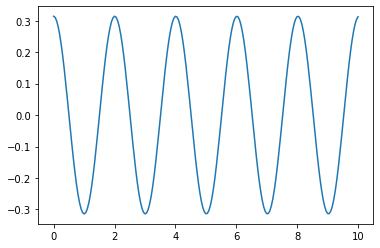

In [21]:
plt.plot(sp_solve.t,sp_solve.y[0])

In [22]:
ode_solve = integrate.odeint(RHS_linear_pendulum,np.array([0.1*np.pi,0.0]),t)

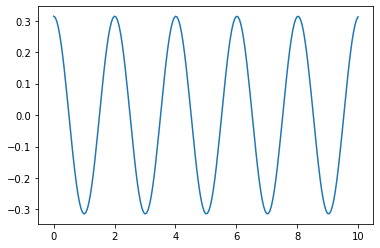

In [23]:
plt.plot(t,ode_solve[:,0])